Kernel Sum: 1.0


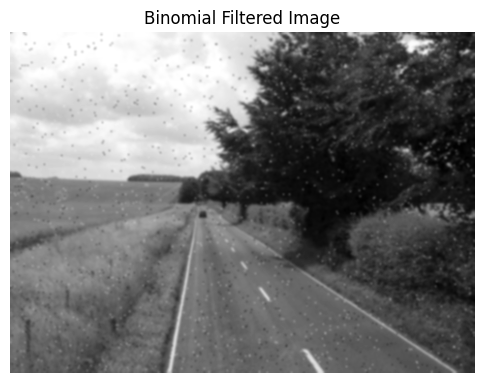

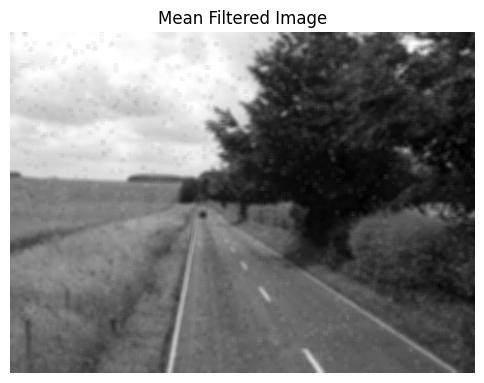

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('C:\\Users\\adrianishak.duda\\OneDrive - Hexagon\\Documents\\Experiment\\Python\\ComputerVision\\roadSaP.png', cv2.IMREAD_GRAYSCALE)

# binomialer Glättungskernel 5x5
kernel = np.array([[1, 4, 6, 4, 1],
                     [4, 16, 24, 16, 4],
                     [6, 24, 36, 24, 6],
                     [4, 16, 24, 16, 4],
                     [1, 4, 6, 4, 1]], dtype=np.float32)
kernel /= sum(kernel[0, :])**2
print("Kernel Sum:", kernel.sum())

img_binomial = cv2.filter2D(img, ddepth=-1, kernel=kernel)

plt.figure(figsize=(6, 6))
plt.imshow(img_binomial, cmap='gray')
plt.title("Binomial Filtered Image")
plt.axis('off')
plt.show()

# Mean Filter 5x5
mean_kernel = np.ones((5, 5), dtype=np.float32)
mean_kernel /= sum(mean_kernel[0, :])**2


img_mean = cv2.filter2D(img, ddepth=-1, kernel=mean_kernel)

plt.figure(figsize=(6, 6))
plt.imshow(img_mean, cmap='gray')
plt.title("Mean Filtered Image")
plt.axis('off')
plt.show()

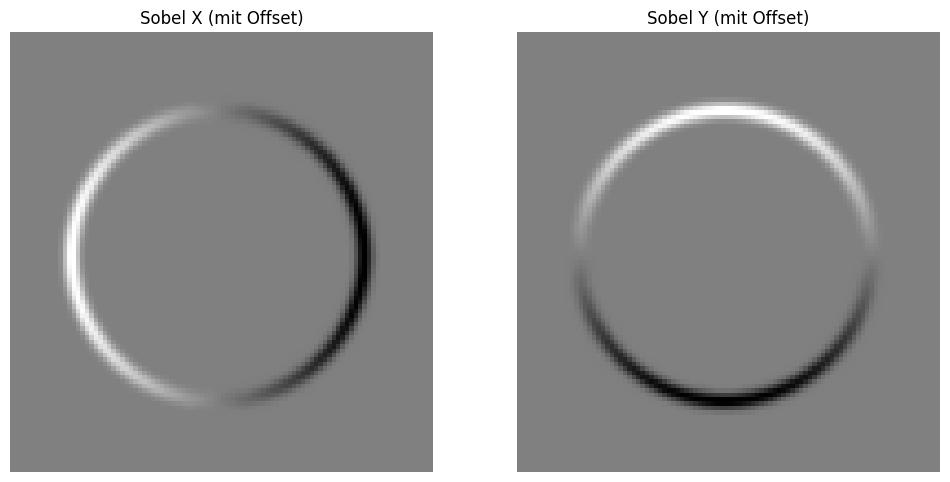

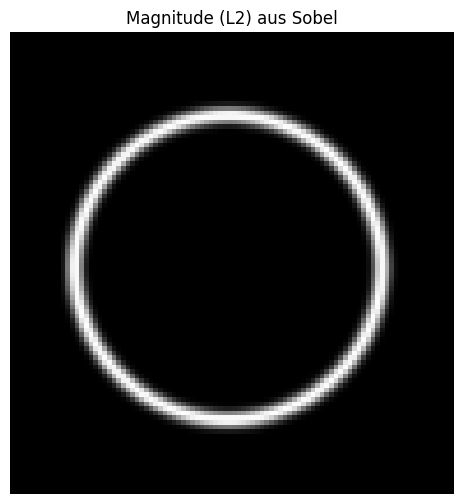

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- Parameter für Skalierung & Verschiebung ---
DIV_SOBEL = 8.0     # typischer Divisor für Sobel (L1-Summe der Gewichte = 8)
OFFSET    = 128.0   # verschiebt 0-Gradient auf Mittelgrau für die Anzeige

# --- Bild laden (float für sauberes Rechnen) ---
img = cv2.imread(r'C:\Users\adrianishak.duda\OneDrive - Hexagon\Documents\Experiment\Python\ComputerVision\SchwarzerKreis.png',
                 cv2.IMREAD_GRAYSCALE).astype(np.float32)

# --- Binomial 5x5 (schön & schonend glätten), normalisiert ---
kernel_binomial = np.array([[1, 4, 6, 4, 1],
                            [4,16,24,16, 4],
                            [6,24,36,24, 6],
                            [4,16,24,16, 4],
                            [1, 4, 6, 4, 1]], dtype=np.float32)
kernel_binomial /= kernel_binomial[0, :].sum()**2  # == /256

img_blur = cv2.filter2D(img, ddepth=cv2.CV_32F, kernel=kernel_binomial)

# --- Sobel-Kerne (separabel abgeleitet), mit Divisor skalieren ---
kx = np.array([[1, 0, -1],
               [2, 0, -2],
               [1, 0, -1]], dtype=np.float32) / DIV_SOBEL

ky = np.array([[ 1, 2, 1],
               [ 0, 0, 0],
               [-1,-2,-1]], dtype=np.float32) / DIV_SOBEL

# 1) Roh-Ableitungen OHNE Offset (wichtig für Magnitude)
gx = cv2.filter2D(img_blur, ddepth=cv2.CV_32F, kernel=kx)
gy = cv2.filter2D(img_blur, ddepth=cv2.CV_32F, kernel=ky)

# 2) Anzeige-Bilder MIT Offset (0 -> ~128), danach in uint8 clippen
gx_show = np.clip(gx + OFFSET, 0, 255).astype(np.uint8)
gy_show = np.clip(gy + OFFSET, 0, 255).astype(np.uint8)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1); plt.imshow(gx_show, cmap='gray'); plt.title("Sobel X (mit Offset)"); plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(gy_show, cmap='gray'); plt.title("Sobel Y (mit Offset)"); plt.axis('off')
plt.show()

# 3) Magnitude NUR aus den Rohwerten (ohne Offset!)
mag = cv2.magnitude(gx, gy)  # == np.hypot(gx, gy)
mag_u8 = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

plt.figure(figsize=(6, 6))
plt.imshow(mag_u8, cmap='gray')
plt.title("Magnitude (L2) aus Sobel")
plt.axis('off')
plt.show()
